### Retail Analysis with Walmart Data

DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_wallmart=pd.read_csv('F://SimpliLearn//Data Science//Projects//Walmart_Store_sales.csv')

In [3]:
df_wallmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df_wallmart.shape

(6435, 8)

In [5]:
df_wallmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
#Checking for null values
df_wallmart.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
#Checking the number of stores
df_wallmart['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

1. Which store has maximum sales

In [8]:
df_wallmart_storesales=df_wallmart.groupby('Store')

In [9]:
#Maximum sales
max_sales=df_wallmart_storesales['Weekly_Sales'].sum()

In [10]:
df_wallmart_storesales['Weekly_Sales'].sum().max()

301397792.46000004

In [11]:
max_sales.idxmax()

20

Store number 20 has maximum sales.

In [12]:
df_wallmart_storesales['Weekly_Sales'].sum().dtype

dtype('float64')

2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [13]:
#Maximum standard deviation in sales
import statistics
max_std=df_wallmart_storesales['Weekly_Sales'].std()

In [14]:
df_wallmart_storesales['Weekly_Sales'].std().max()

317569.9494755081

In [15]:
max_std.idxmax()

14

Store 14 has maximum standard deviation for sales.

In [16]:
#Coefficient of mean to standard deviation
# Overall Coefficient of mean to standard deviation
df_wallmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [17]:
overall_coefficient = df_wallmart['Weekly_Sales'].std()/df_wallmart['Weekly_Sales'].mean()
overall_coefficient

0.5390501956168998

In [18]:
#Coeff of mean for store 14 only, which has highest std deviation
#Selecting the store 14 information
df_14=df_wallmart.loc[df_wallmart['Store']==14]
df_14

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1859,14,05-02-2010,2623469.95,0,27.31,2.784,181.871190,8.992
1860,14,12-02-2010,1704218.84,1,27.73,2.773,181.982317,8.992
1861,14,19-02-2010,2204556.70,0,31.27,2.745,182.034782,8.992
1862,14,26-02-2010,2095591.63,0,34.89,2.754,182.077469,8.992
1863,14,05-03-2010,2237544.75,0,37.13,2.777,182.120157,8.992
...,...,...,...,...,...,...,...,...
1997,14,28-09-2012,1522512.20,0,64.88,3.997,192.013558,8.684
1998,14,05-10-2012,1687592.16,0,64.89,3.985,192.170412,8.667
1999,14,12-10-2012,1639585.61,0,54.47,4.000,192.327265,8.667
2000,14,19-10-2012,1590274.72,0,56.47,3.969,192.330854,8.667


In [19]:
df_14.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,143.0,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,14.0,2.020978e+06,0.069930,57.790979,3.417608,186.285678,8.648748
std,0.0,3.175699e+05,0.255926,16.271612,0.443029,3.594820,0.151460
min,14.0,1.479515e+06,0.000000,24.050000,2.699000,181.646815,8.424000
25%,14.0,1.873298e+06,0.000000,45.585000,2.921000,182.619515,8.523000
50%,14.0,2.004330e+06,0.000000,58.850000,3.541000,185.937438,8.625000
75%,14.0,2.125780e+06,0.000000,72.585000,3.809000,189.924736,8.724000
max,14.0,3.818686e+06,1.000000,82.990000,4.066000,192.330854,8.992000


In [20]:
store14_coefficient=df_14['Weekly_Sales'].std()/df_14['Weekly_Sales'].mean()
store14_coefficient

0.15713673600948339

In [21]:
#Coeff of mean to standard deviation
'''df_store14=df.loc[df['Store'] == 14]'''

"df_store14=df.loc[df['Store'] == 14]"

3. Which store/s has good quarterly growth rate in Q3’2012


First we have to convert the date column into date-time format.This would help to separate the months and year. Separate month and year by creating extra columns for them. Then select rows which have 2012 as the year. then define the quaters

In [22]:
#Converting the dates to date-time format
df_wallmart['Date']=pd.to_datetime(df_wallmart['Date'])
df_wallmart.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [23]:
#Creating new columns of month and year
df_wallmart['Year']=pd.DatetimeIndex(df_wallmart['Date']).year
df_wallmart['Month']=pd.DatetimeIndex(df_wallmart['Date']).month
df_wallmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [24]:
#Selecting only year 2012
df_2012=df_wallmart.loc[df_wallmart['Year']==2012]
df_2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,2012,6
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,2012,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [25]:
#defining the quaters
'''Q1=1,2,3  Q2=4.5.6  Q3=7.8.9  Q4=10,11,12'''
#Selecting only the 3rd quater
df_2012Q3=df_2012.loc[(df_2012['Month']>6) & (df_2012['Month']<10)]
df_2012Q3

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
109,1,2012-09-03,1675431.16,0,58.76,3.669,221.059189,7.348,2012,9
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143,2012,8
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,2012,7
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,2012,7
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,2012,7
...,...,...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684,2012,8
6427,45,2012-07-09,766512.66,1,75.70,3.911,191.577676,8.684,2012,7
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684,2012,9
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684,2012,9


In [26]:
#Finding out the best sale
MaxSales_2012Q3=df_2012Q3.groupby('Store')['Weekly_Sales'].sum()
print(MaxSales_2012Q3)
print('\nMaximum sale for the shop number', MaxSales_2012Q3.idxmax())

Store
1     18633209.98
2     22396867.61
3      4966495.93
4     25652119.35
5      3880621.88
6     18341221.11
7      7322393.92
8     10873860.34
9      6528239.56
10    21169356.45
11    16094363.07
12    11777508.50
13    24319994.35
14    20140430.40
15     6909374.37
16     6441311.11
17    11533998.38
18    12507521.72
19    16644341.31
20    24665938.11
21     8403507.99
22    11818544.33
23    17103654.36
24    16125999.86
25     8309440.44
26    12417575.35
27    20191238.11
28    15055659.67
29     6127862.07
30     5181974.44
31    16454328.46
32    14142164.84
33     3177072.43
34    11476258.98
35    10252122.68
36     3578123.58
37     6250524.08
38     5129297.64
39    18899955.17
40    11647661.37
41    16373588.44
42     6830839.86
43     7376726.03
44     4020486.01
45     8851242.32
Name: Weekly_Sales, dtype: float64

Maximum sale for the shop number 4


Hence, shop umber 4 has maximum weekly sales for 3rd quater of 2012.

4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [27]:
#Holiday task
df_wallmart_holiday=df_wallmart.groupby('Holiday_Flag')
df_holidays=df_wallmart_holiday.get_group(1)
df_nonholidays=df_wallmart_holiday.get_group(0)
mean_nonholiday_sales=df_nonholidays['Weekly_Sales'].mean()
print('Mean of non-holiday sales', mean_nonholiday_sales)
df_holidays[df_holidays['Weekly_Sales']>mean_nonholiday_sales]

Mean of non-holiday sales 1041256.3802088564


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010,10
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011,11
...,...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,2011,12
5825,41,2012-10-02,1238844.56,1,22.00,3.103,196.919506,6.589,2012,10
5855,41,2012-07-09,1392143.82,1,67.41,3.596,198.095048,6.432,2012,7
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,2010,11


In [28]:
#The above dataframe gives the information about the holiday events in which the sales were higher than the mean of non-holiday sales
# We have to check if the dates of the holidays fall in this according to holiday names
df_final_holiday=df_holidays[df_holidays['Weekly_Sales']>mean_nonholiday_sales]
df_final_holiday['Date'].unique()

array(['2010-12-02T00:00:00.000000000', '2010-10-09T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-11-02T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-10-02T00:00:00.000000000', '2012-07-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

5. Provide a monthly and semester view of sales in units and give insights

In [29]:
# To provide a monthly and semester view of sales, we would use bar plot. First make the semester column based on months
'''There is a method to split the month using np.where'''
df_wallmart['Semester']=np.where(df_wallmart['Month']<7,1,2)
#Here np.where('condition, True output, False output')
df_wallmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,2
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,1
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,2
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,2


In [30]:
#Plotting the sales
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

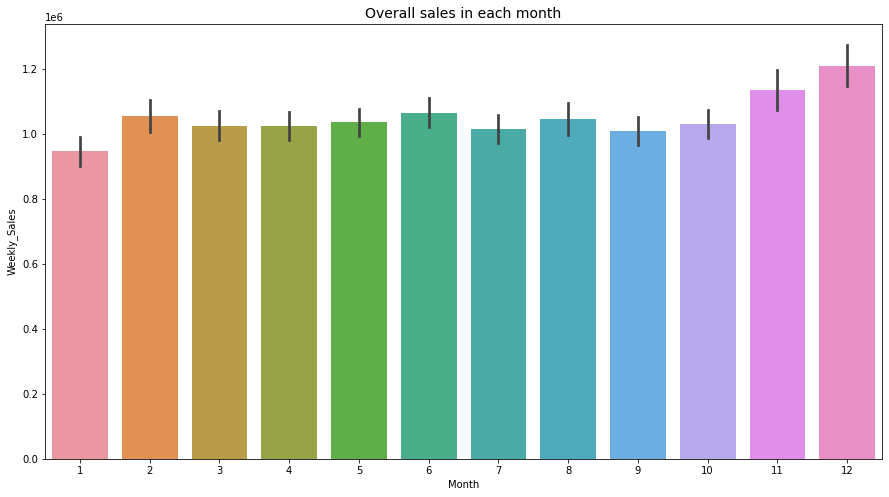

In [31]:
#Total sales according to months
plt.figure(figsize=(15,8))
sns.barplot(x='Month', y='Weekly_Sales', data=df_wallmart)
plt.title('Overall sales in each month', fontsize=14)
plt.show()

We see that towards the year end, the overall sales increases. Months november and December have higher overall sales than the other months. Probably it is because of the holiday season. The sales drastically decreases in January as compared to year ends.

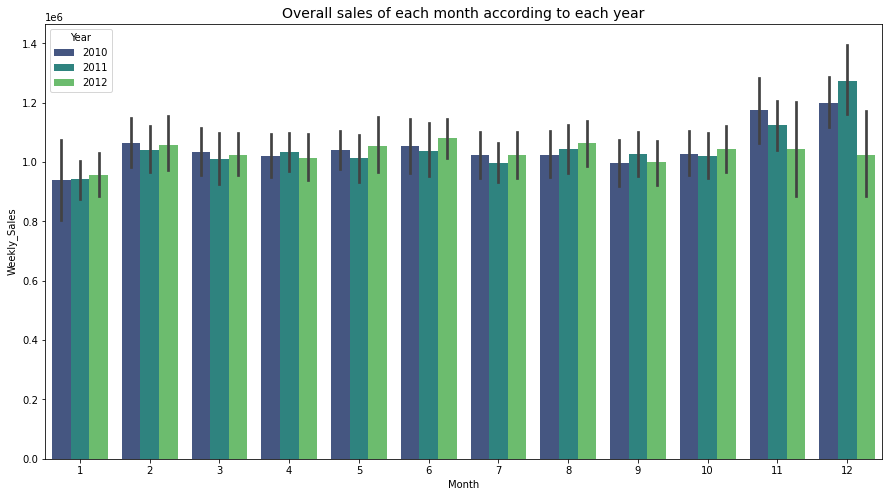

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(x='Month', y='Weekly_Sales', hue='Year', data=df_wallmart, palette='viridis')
plt.title('Overall sales of each month according to each year', fontsize=14)
plt.show()

Both 2010 and 2011 had higher sales toward the end of the year in November and December. But 2012 had a lower sales compared to the rest of the months. For the year 2012, the sales peaked in the mid of the year.

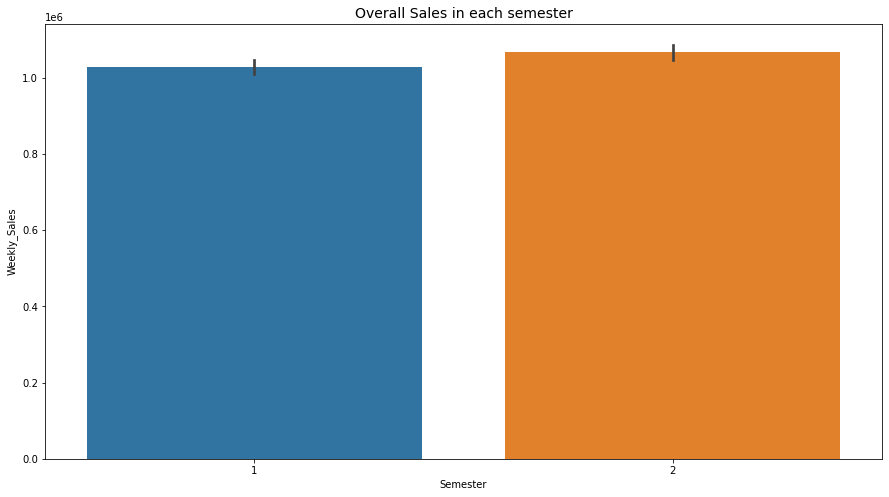

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(x='Semester', y='Weekly_Sales', data=df_wallmart)
plt.title('Overall Sales in each semester', fontsize=14)
plt.show()

The overall sales for 2nd semester exceeds the 1st semester.

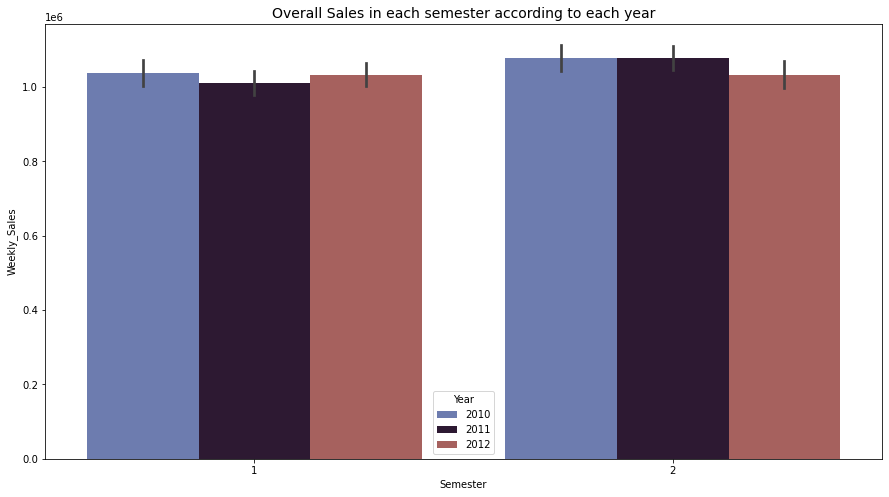

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(x='Semester', y='Weekly_Sales', hue='Year', data=df_wallmart, palette='twilight')
plt.title('Overall Sales in each semester according to each year', fontsize=14)
plt.show()

For 2010 and 2011, the sales during 2nd semester is more but for 2012 the sales were higher during 1st semester.

Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [35]:
#Modelling part
# Creating a column for days
df_wallmart['Day']=df_wallmart['Date'].dt.day_name()
df_wallmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Semester,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,2,Friday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,1,Thursday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,2,Monday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,2,Friday


In [36]:
# Building a prediction model for Store 1
# Get the values only for store 1
df_store1=df_wallmart.loc[df_wallmart['Store']==1]
df_store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Semester,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9,2,Friday
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,2012,5,1,Thursday
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,2012,12,2,Monday
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10,2,Friday


In [37]:
# Sorting the rows according to dates
df_store1=df_store1.sort_values(by=['Date'])
#Adding column through loop
newdate=[]
for i in range(1,144):
    newdate.append(i)
df_store1['Restructured_dates']=newdate
df_store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Semester,Day,Restructured_dates
34,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,2010,1,1,Sunday,1
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,2,1,Thursday,2
21,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,2010,2,1,Sunday,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1,Friday,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1,Friday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1,2012-10-08,1592409.97,0,85.05,3.494,221.958433,6.908,2012,10,2,Monday,139
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10,2,Friday,140
142,1,2012-10-26,1493659.74,0,69.16,3.506,223.444251,6.573,2012,10,2,Friday,141
118,1,2012-11-05,1611096.05,0,73.77,3.688,221.725663,7.143,2012,11,2,Monday,142


In [38]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
X=df_store1[['Restructured_dates','Temperature','Holiday_Flag']]
Y=df_store1['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=23)
#Fitting the data
linreg.fit(X_train, y_train)
#Predicting Data
y_predict=linreg.predict(X_test)

In [39]:
#Checking the accuracy Cannot use accuracy function it is used in classification, not regression. So use r2 score.
from sklearn.metrics import r2_score
rscore=r2_score(y_test, y_predict)
print(rscore)


0.03817158047671676


Not so great accuracy. Lets try to improve it.

Lets see the correlation of the variables with the Weekly sales.

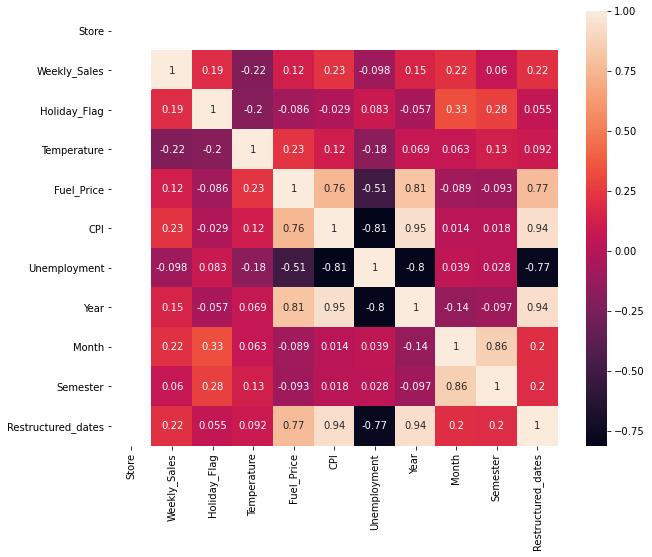

In [40]:
correlation=df_store1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True)
plt.show()

We see that Unemployment is least correlated with Weekly Sales -0.098, very close to 0.  CPI is the highest correlated variable with Weekly sales 0.23. Fuel price is also positively correlated with Weekly sales. So Unemployment would not have any effect on weekly sales for store 1. 
From the correlation graph, we would utilise CPI, Temperature, Restructured dates and Month for prediction.



In [41]:
X_new=df_store1[['CPI','Temperature', 'Restructured_dates', 'Month']]
Y_new=Y

In [42]:
print(X_new.shape)
print(Y_new.shape)

(143, 4)
(143,)


In [43]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_new_ss=ss.fit_transform(X_new)

In [44]:
xtrain2, xtest2, ytrain2, ytest2=train_test_split(X_new_ss, Y_new, test_size=0.2, random_state=23)
linreg.fit(xtrain2, ytrain2)
y_predict2=linreg.predict(xtest2)

In [45]:
rscore2=r2_score(ytest2, y_predict2)
print(rscore2)

0.13877520192225123


In [46]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
X_new_minmax=minmax.fit_transform(X_new)

In [47]:
xtrain3, xtest3, ytrain3, ytest3=train_test_split(X_new_minmax, Y_new, test_size=0.2, random_state=23)
linreg.fit(xtrain3, ytrain3)
y_predict3=linreg.predict(xtest3)

In [48]:
rscore3=r2_score(ytest3, y_predict3)
print(rscore3)

0.1387752019222509
